# 필요한 라이브러리 불러오기

In [1]:
import plotly 
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go 

warnings.filterwarnings("ignore")
pd.options.display.max_rows = None
pd.options.display.max_columns = None
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [49]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
age_gender = pd.read_csv('age_gender_info.csv')
submission = pd.read_csv('sample_submission.csv')

# 데이터 오류 해결하기

### 오류1번 

In [50]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [51]:
correct_train = train.groupby('단지코드').agg({'전용면적별세대수':'sum'})
train['총합계'] = train['단지코드'].map(correct_train['전용면적별세대수'])

In [52]:
correct_test = test.groupby('단지코드').agg({'전용면적별세대수':'sum'})
test['총합계'] = test['단지코드'].map(correct_test['전용면적별세대수'])

In [53]:
# 기존 세대수 column 삭제 and 컬럼 순서 조정 
train = train[['단지코드', '총합계', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']]

In [54]:
# 기존 세대수 column 삭제 and 컬럼 순서 조정 
test = test[['단지코드', '총합계', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수']]

### 오류2번

In [55]:
# 오류 2번 해당 train 데이터셋 제거
train = train[train['단지코드'] != 'C2085']
train = train[train['단지코드'] != 'C1397']
train = train[train['단지코드'] != 'C2431']
train = train[train['단지코드'] != 'C1649']
train = train[train['단지코드'] != 'C1036']

### 오류3번

In [56]:
# 오류 3번 해당 train 데이터셋 제거
train = train[train['단지코드'] != 'C1095']
train = train[train['단지코드'] != 'C2051']
train = train[train['단지코드'] != 'C1218']
train = train[train['단지코드'] != 'C1894']
train = train[train['단지코드'] != 'C2483']
train = train[train['단지코드'] != 'C1502']
train = train[train['단지코드'] != 'C1988']

# 데이터 타입 변경 & 삭제 하기

## 임대보증금, 임대료 '-' 값 nan 처리 & 타입 objecy => float

In [57]:
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

# 서울 특별시 데이터 삭제 

In [58]:
train = train[train.지역 != '서울특별시']

# 결측치 처리하기

### 버스정류장, 지하철 nan 값 => 0 으로 처리

In [59]:
# test 는 버스정류장 결측치 X 

train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
train['도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].fillna(0)

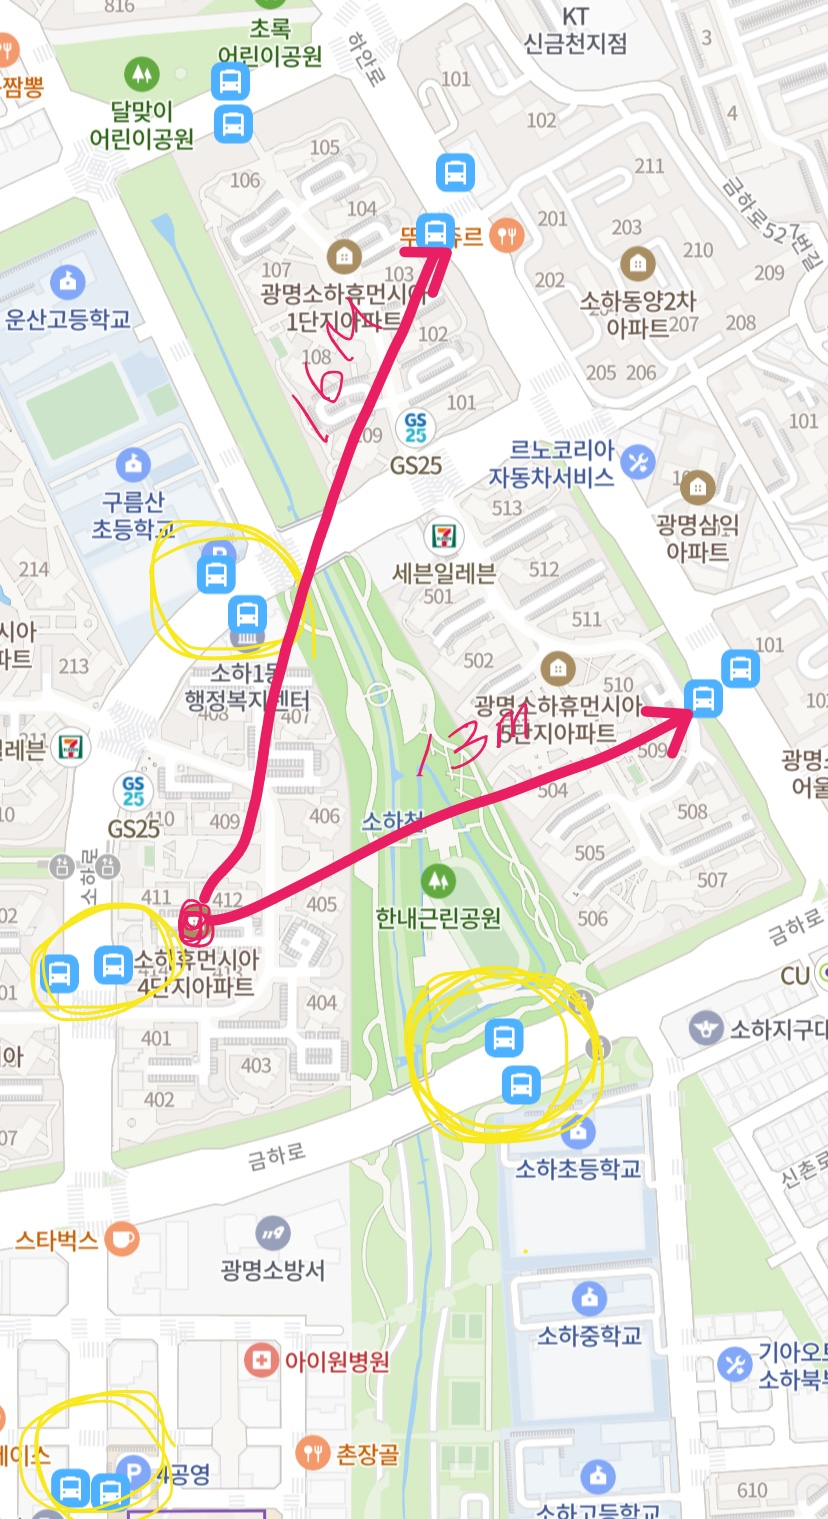

## C1852를 직접 찾아본 결과 주변에 총 8개의 정류장이 있음을 확인함. 50 => 8 개로 변경

In [60]:
train['도보 10분거리 내 버스정류장 수'].unique()

array([ 3.,  1.,  2.,  6., 10.,  5.,  4.,  7., 12., 14.,  8.,  0., 20.,
       11., 16., 15., 19.])

In [61]:
test['도보 10분거리 내 버스정류장 수'].unique()

array([ 2.,  3., 16.,  6.,  1.,  4.,  5.,  8., 10., 13.,  7., 11., 50.,
       12., 14., 18., 15., 19., 17.])

In [62]:
test[test['도보 10분거리 내 버스정류장 수']==50]

,단지코드,총합계,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
383,C1852,898,아파트,경기도,국민임대,39.59,219,6.0,H,23720000.0,197230.0,0.0,50.0,785.0
384,C1852,898,아파트,경기도,국민임대,39.72,56,6.0,A,23720000.0,197230.0,0.0,50.0,785.0
385,C1852,898,아파트,경기도,국민임대,39.72,44,6.0,A,23720000.0,197230.0,0.0,50.0,785.0
386,C1852,898,아파트,경기도,국민임대,46.90,46,6.0,A,37454000.0,259660.0,0.0,50.0,785.0
387,C1852,898,아파트,경기도,국민임대,46.90,22,6.0,A,37454000.0,259660.0,0.0,50.0,785.0
388,C1852,898,아파트,경기도,국민임대,46.90,225,6.0,H,37454000.0,259660.0,0.0,50.0,785.0
389,C1852,898,아파트,경기도,국민임대,51.93,136,6.0,H,45193000.0,308350.0,0.0,50.0,785.0
390,C1852,898,아파트,경기도,국민임대,51.93,44,6.0,H,45193000.0,308350.0,0.0,50.0,785.0
391,C1852,898,아파트,경기도,국민임대,59.61,106,6.0,H,61674000.0,370790.0,0.0,50.0,785.0


In [63]:
test.loc[test['도보 10분거리 내 버스정류장 수'] == 50, '도보 10분거리 내 버스정류장 수'] = 8

## 임대료, 임대보증금 0 값 -> 지역 임대료, 임대보증금 평균 값으로 변경

- train 

In [64]:
#임대료 처리 (임대료가 결측치인 것 => 0으로 치환)
train.loc[train['공급유형'] == '공공분양', '임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형'] == '장기전세', '임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형'] == '국민임대', '임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형'] == '행복주택', '임대료'] = train['임대료'].fillna(0)

#임대보증금 처리
train.loc[train['공급유형'] == '공공분양', '임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형'] == '장기전세', '임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형'] == '국민임대', '임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형'] == '행복주택', '임대보증금'] = train['임대보증금'].fillna(0)

In [65]:
#임대 상가의 임대료 처리  (임대료가 0 인 값을 지역 평균으로 처리)
train.loc[train['지역'] == '부산광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
train.loc[train['지역'] == '대전광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
train.loc[train['지역'] == '경상남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '경상남도']['임대료'].mean())
train.loc[train['지역'] == '충청남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
train.loc[train['지역'] == '강원도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '제주특별자치도']['임대료'].mean())

#임대 상가의 임대보증금 처리 
train.loc[train['지역'] == '부산광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
train.loc[train['지역'] == '대전광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
train.loc[train['지역'] == '경상남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '경상남도']['임대보증금'].mean())
train.loc[train['지역'] == '충청남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
train.loc[train['지역'] == '강원도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '제주특별자치도']['임대보증금'].mean())

- test

In [66]:
#임대료 처리 
test.loc[test['공급유형'] == '영구임대', '임대료'] = test['임대료'].fillna(0)
test.loc[test['공급유형'] == '행복주택', '임대료'] = test['임대료'].fillna(0)

#임대보증금 처리
test.loc[test['공급유형'] == '영구임대', '임대보증금'] = test['임대보증금'].fillna(0)
test.loc[test['공급유형'] == '행복주택', '임대보증금'] = test['임대보증금'].fillna(0)

In [67]:
#임대 상가의 임대료 처리  (test 특성 기준 test null 값 처리는 data leakage 여서 train의 지역 기준으로 test 처리)
test.loc[test['지역'] == '부산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
test.loc[test['지역'] == '대전광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
test.loc[test['지역'] == '울산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '울산광역시']['임대료'].mean())
test.loc[test['지역'] == '충청남도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
test.loc[test['지역'] == '강원도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())  


#임대 상가의 임대보증금 처리 
test.loc[test['지역'] == '부산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '대전광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
test.loc[test['지역'] == '울산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '울산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '충청남도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
test.loc[test['지역'] == '강원도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())

## 자격유형 처리 => test 자격유형 결측치를 각각 A와 C로 변경함. 

In [68]:
test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'
test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'

In [69]:
# 최종적으로 결측치가 없음을 확인함. 
train.isnull().sum().sum(),test.isnull().sum().sum()

(0, 0)

# 파생변수 생성

## 미성년자, 중년층 파생변수 생성 

In [70]:
minors = ['10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)']
middleage = ['40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)']

age_gender['미성년자'] = age_gender[minors].sum(axis=1)
age_gender['중년층'] = age_gender[middleage].sum(axis=1)

In [71]:
# train, test 데이터프레임을 기준으로 age_gender 데이터프레임을 왼쪽으로 병합

train = train.merge(age_gender, left_on= ["지역"], right_on= ["지역"], how='left')
test = test.merge(age_gender, left_on= ["지역"], right_on= ["지역"], how='left')

# 변수 확정

- 단지코드가 같으면 <span class="mark">[총합계, 지역, 공가수, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수, 단지내주차면수, 등록차량수]</span>가 같습니다.
- 단지코드가 같아도 <span class="girk">[임대건물구분, 공급유형, 전용면적, 전용면적별세대수, 자격유형, 임대보증금, 임대료]</span>는 다를 수 있습니다.

In [72]:
train.shape, test.shape

((2500, 39), (949, 38))

- 전용면적은 동일 단지코드의 전용면적을 다 더한후, 동일 단지코드의 개수로 나눈다. <- mean 
- 전용면적별 세대수 또한 세대수를 다 더한후, 동일 단지코드의 개수로 나눈다. <- mean
- 임대보증금과 임대료도 mean으로 처리. 
- 임대건물구분도 범주화 시킨다. 
- 공급 유형과 자격유형은 어떻게 범주화를 시킬까? 


공급 유형 + 자격유형

In [73]:
train['공급_자격'] = train.apply(lambda r : r['공급유형'] + '_' +r['자격유형'], axis=1)
test['공급_자격'] = test.apply(lambda r : r['공급유형'] + '_' +r['자격유형'], axis=1)

In [74]:
print("train - test (공급_자격 차집합) : ", set(train.공급_자격).difference(set(test.공급_자격))) ##train에만 있는 값들 찾아보기 
print("test - train (공급_자격 차집합) : ", set(test.공급_자격).difference(set(train.공급_자격)))

train - test (공급_자격 차집합) :  {'영구임대_F', '영구임대_A', '공공임대(5년)_A', '행복주택_O', '영구임대_E', '국민임대_B', '공공분양_D'}
test - train (공급_자격 차집합) :  {'영구임대_D'}


In [75]:
train = train[train.공급_자격 != '공공분양_D']
train = train[train.공급_자격 != '공공임대(5년)_A']
train = train[train.공급_자격 != '국민임대_B']
train = train[train.공급_자격 != '영구임대_A']
train = train[train.공급_자격 != '영구임대_E']
train = train[train.공급_자격 != '영구임대_F']
train = train[train.공급_자격 != '장기전세_A']
train = train[train.공급_자격 != '행복주택_O']

# test = test[test.공급_자격 != '영구임대_D']

전용면적

In [76]:
train['전용면적'] = train['전용면적']//2*2 
test['전용면적'] = test['전용면적']//2*2

In [77]:
print("train - test (전용면적 차집합) : ", set(train.전용면적).difference(set(test.전용면적))) ##train에만 있는 값들 찾아보기 
print("test - train (전용면적 차집합) : ", set(test.전용면적).difference(set(train.전용면적)))

train - test (전용면적 차집합) :  {66.0, 136.0, 72.0, 108.0, 406.0, 56.0, 126.0, 316.0, 62.0}
test - train (전용면적 차집합) :  {8.0, 252.0}


In [78]:
train = train[train.전용면적 != 52]##
train = train[train.전용면적 != 56]##
train = train[train.전용면적 != 62]##
train = train[train.전용면적 != 64]
train = train[train.전용면적 != 66] ##
train = train[train.전용면적 != 72] ##
train = train[train.전용면적 != 78]
train = train[train.전용면적 != 108] ##
train = train[train.전용면적 != 126]##
train = train[train.전용면적 != 136]##
train = train[train.전용면적 != 316]##
train = train[train.전용면적 != 406]##

# test = test[test.전용면적 != 8]
# test = test[test.전용면적 != 252]

In [79]:
# 전용면적별 세대수, 임대보증금, 임대료

In [80]:
unique_cols = ['총합계', '공가수', '미성년자', '중년층',
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
               '도보 10분거리 내 버스정류장 수',
               '단지내주차면수', '등록차량수']

train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()
test_agg = test.set_index('단지코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()

In [81]:
tr = train.groupby(['단지코드']).mean() ##같은 단지코드 안에서의 평균 값, max 값 등은 data leakage가 아닌 것으로 보임 
ts = test.groupby(['단지코드']).mean()

train_agg['전용면적별세대수'] = tr['전용면적별세대수']
test_agg['전용면적별세대수'] = ts['전용면적별세대수']

train_agg['임대보증금'] = tr['임대보증금']
test_agg['임대보증금'] = ts['임대보증금']

train_agg['임대료'] = tr['임대료']
test_agg['임대료'] = ts['임대료']

In [82]:
train = train.set_index('단지코드')


In [83]:
test = test.set_index('단지코드')

In [ ]:
train_OHI = pd.get_dummies(test)
print(train_OHI.shape)
train_OHI.head(2)

In [85]:
test_OHI = pd.get_dummies(test)
print(test_OHI.shape)
test_OHI.head(2)

(949, 85)


,총합계,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),미성년자,중년층,임대건물구분_상가,임대건물구분_아파트,지역_강원도,지역_경기도,지역_경상남도,지역_경상북도,지역_광주광역시,지역_대구광역시,지역_대전광역시,지역_부산광역시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도,공급유형_공공임대(10년),공급유형_공공임대(50년),공급유형_공공임대(분납),공급유형_국민임대,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_C,자격유형_D,자격유형_E,자격유형_G,자격유형_H,자격유형_I,자격유형_J,자격유형_K,자격유형_L,자격유형_M,자격유형_N,공급_자격_공공임대(10년)_A,공급_자격_공공임대(50년)_A,공급_자격_공공임대(분납)_A,공급_자격_국민임대_A,공급_자격_국민임대_E,공급_자격_국민임대_G,공급_자격_국민임대_H,공급_자격_영구임대_C,공급_자격_영구임대_D,공급_자격_영구임대_I,공급_자격_임대상가_D,공급_자격_행복주택_J,공급_자격_행복주택_K,공급_자격_행복주택_L,공급_자격_행복주택_M,공급_자격_행복주택_N
단지코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C1072,754,38.0,116,14.0,22830000.0,189840.0,0.0,2.0,683.0,0.03803,0.039507,0.052546,0.05399,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.00539,0.001707,0.00029,0.000067,0.184072,0.303766,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
C1072,754,46.0,30,14.0,36048000.0,249930.0,0.0,2.0,683.0,0.03803,0.039507,0.052546,0.05399,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.00539,0.001707,0.00029,0.000067,0.184072,0.303766,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
encoding_cols = ['공급_자격_국민임대_A','공급_자격_국민임대_E', '공급_자격_국민임대_G', '공급_자격_국민임대_H',
                '공급_자격_영구임대_C', '공급_자격_영구임대_I', '공급_자격_임대상가_D', '공급_자격_행복주택_J',
                '공급_자격_행복주택_K', '공급_자격_행복주택_L', '공급_자격_행복주택_M', '공급_자격_행복주택_N',
                '지역_강원도', '지역_경기도', '지역_경상남도','지역_경상북도','지역_광주광역시','지역_대구광역시',
                 '지역_대전광역시','지역_부산광역시','지역_세종특별자치시','지역_울산광역시','지역_전라남도','지역_전라북도',
                '지역_제주특별자치도','지역_충청남도','지역_충청북도']

train_agg2 = train_OHI[encoding_cols].groupby('단지코드').sum()
train_agg_ = pd.merge(train_agg, train_agg2, on='단지코드')

In [87]:
encoding_cols = ['공급_자격_국민임대_A','공급_자격_국민임대_E', '공급_자격_국민임대_G', '공급_자격_국민임대_H',
                '공급_자격_영구임대_C', '공급_자격_영구임대_I', '공급_자격_임대상가_D', '공급_자격_행복주택_J',
                '공급_자격_행복주택_K', '공급_자격_행복주택_L', '공급_자격_행복주택_M', '공급_자격_행복주택_N',
                '지역_강원도', '지역_경기도', '지역_경상남도','지역_경상북도','지역_광주광역시','지역_대구광역시',
                 '지역_대전광역시','지역_부산광역시','지역_세종특별자치시','지역_울산광역시','지역_전라남도','지역_전라북도',
                '지역_제주특별자치도','지역_충청남도','지역_충청북도']

test_agg2 = test_OHI[encoding_cols].groupby('단지코드').sum()
test_agg_ = pd.merge(test_agg, test_agg2, on='단지코드')

# 모델학습

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [91]:
# 모델 학습
X_train = train_agg_.drop('등록차량수', axis=1)  # '단지코드'와 '등록차량수' 열은 제외
y_train = train_agg_['등록차량수']
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 모델 예측
X_test = test_agg_ 
y_predict = model.predict(X_test)
y_predict[:5]

array([ 708.53282558, 1274.18913011,  527.33985469,  563.55101198,
       1200.17675737])

<AxesSubplot: >

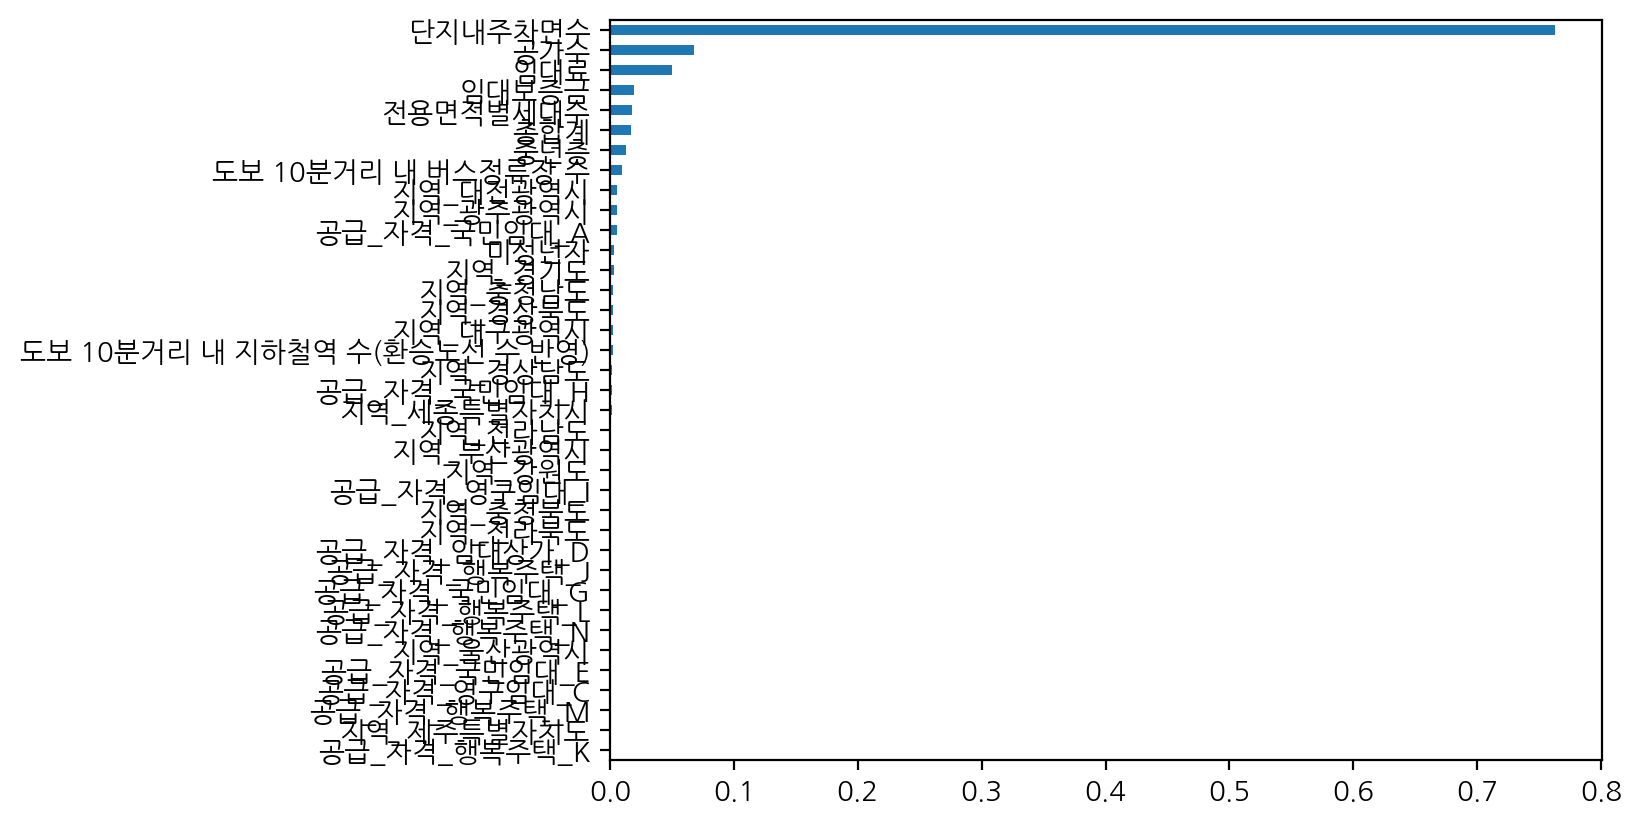

In [92]:
# Casual 의 피처 중요도 
fi = pd.Series(model.feature_importances_)
fi.index = model.feature_names_in_
fi.sort_values().plot.barh()

In [93]:
submission.shape

(150, 2)

In [94]:
submission["num"] = abs(y_predict)
submission

,code,num
0,C1072,708.532826
1,C1128,1274.189130
2,C1456,527.339855
3,C1840,563.551012
4,C1332,1200.176757
5,C1563,1761.489748
6,C1794,932.091661
7,C1640,471.202308
8,C1377,379.318770
9,C2072,271.617339


In [95]:
submission.shape

(150, 2)

In [96]:
file_name = "submission_zjan0ghy.csv"
file_name

'submission_zjan0ghy.csv'

In [97]:
submission.to_csv(file_name, index=False)

In [98]:
pd.read_csv(file_name)

,code,num
0,C1072,708.532826
1,C1128,1274.189130
2,C1456,527.339855
3,C1840,563.551012
4,C1332,1200.176757
5,C1563,1761.489748
6,C1794,932.091661
7,C1640,471.202308
8,C1377,379.318770
9,C2072,271.617339
